In [1]:
# already installed on my local machine
# &pip install flair

# Training custom sequence labeling models

Loading a tagged corpus

In [2]:
from flair.data import Corpus
from flair.datasets import UD_ENGLISH

corpus = UD_ENGLISH()

2022-12-05 14:54:42,672 Reading data from /home/stefan/.flair/datasets/ud_english
2022-12-05 14:54:42,672 Train: /home/stefan/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-12-05 14:54:42,673 Dev: /home/stefan/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-12-05 14:54:42,673 Test: /home/stefan/.flair/datasets/ud_english/en_ewt-ud-test.conllu


In [3]:
tag_type = 'pos'

In [4]:
import random
random.seed(123)

corpus.downsample(0.10)
print(corpus)

Corpus: 1254 train + 200 dev + 208 test sentences


tag dictionary

In [5]:
tag_dictionary = corpus.make_label_dictionary(tag_type)
print(tag_dictionary)

2022-12-05 14:54:51,674 Computing label dictionary. Progress:


1254it [00:00, 31204.95it/s]

2022-12-05 14:54:51,740 Dictionary created for label 'pos' with 50 values: NN (seen 2647 times), IN (seen 2082 times), DT (seen 1646 times), NNP (seen 1282 times), JJ (seen 1167 times), PRP (seen 1135 times), . (seen 1066 times), RB (seen 1006 times), VB (seen 916 times), , (seen 873 times), NNS (seen 820 times), CC (seen 667 times), VBD (seen 547 times), VBZ (seen 488 times), VBP (seen 477 times), VBN (seen 403 times), CD (seen 362 times), MD (seen 326 times), TO (seen 319 times), PRP$ (seen 311 times)
Dictionary with 50 tags: <unk>, NN, IN, DT, NNP, JJ, PRP, ., RB, VB, ,, NNS, CC, VBD, VBZ, VBP, VBN, CD, MD, TO, PRP$, VBG, WDT, -LRB-, -RRB-, UH, WRB, ``, WP, '', RP, POS, :, NNPS, HYPH, JJS, EX, NFP, JJR, RBR, GW, $, ADD, PDT, RBS, LS, SYM, AFX, FW, WP$


Building the embedding stack

In [6]:
from flair.embeddings import (WordEmbeddings,
                            FlairEmbeddings,
                            StackedEmbeddings)

embedding_types = [
    WordEmbeddings('en'),
    FlairEmbeddings('news-forward'),
    FlairEmbeddings('news-backward')
]

embeddings = StackedEmbeddings(embeddings=embedding_types)

Initialise the Sequence Tagger

In [7]:
from flair.models import SequenceTagger

tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=tag_dictionary,
                        tag_type=tag_type,
                        use_crf=True)

2022-12-05 14:55:00,452 SequenceTagger predicts: Dictionary with 50 tags: <unk>, NN, IN, DT, NNP, JJ, PRP, ., RB, VB, ,, NNS, CC, VBD, VBZ, VBP, VBN, CD, MD, TO, PRP$, VBG, WDT, -LRB-, -RRB-, UH, WRB, ``, WP, '', RP, POS, :, NNPS, HYPH, JJS, EX, NFP, JJR, RBR, GW, $, ADD, PDT, RBS, LS, SYM, AFX, FW, WP$


Training

In [8]:
from flair.trainers import ModelTrainer

trainer = ModelTrainer(tagger, corpus)

In [ ]:
trainer.train('tagger',
                learning_rate=0.1,
                mini_batch_size=32,
                mini_batch_chunk_size=None,
                max_epochs=150,
                embeddings_storage_mode='gpu',
                )

# Loading and uscing custom Flair Models

In [10]:
from flair.models import SequenceTagger

tagger = SequenceTagger.load('tagger/final-model.pt')

2022-12-05 15:01:45,861 loading file tagger/final-model.pt
2022-12-05 15:01:47,501 SequenceTagger predicts: Dictionary with 52 tags: <unk>, NN, IN, DT, NNP, JJ, PRP, ., RB, VB, ,, NNS, CC, VBD, VBZ, VBP, VBN, CD, MD, TO, PRP$, VBG, WDT, -LRB-, -RRB-, UH, WRB, ``, WP, '', RP, POS, :, NNPS, HYPH, JJS, EX, NFP, JJR, RBR, GW, $, ADD, PDT, RBS, LS, SYM, AFX, FW, WP$


In [11]:
from flair.data import Sentence
sentence = Sentence('Hello Sven, how are you doing today?')
tagger.predict(sentence)
print(sentence)

Sentence: "Hello Sven , how are you doing today ?" → ["Hello"/UH, "Sven"/NNP, ","/,, "how"/WRB, "are"/VBP, "you"/PRP, "doing"/VBG, "today"/NN, "?"/.]


2022-12-05 15:01:48,218 ----------------------------------------------------------------------------------------------------
2022-12-05 15:01:48,219 WARNING: No LOSS found for test split in this data.
2022-12-05 15:01:48,219 Are you sure you want to plot LOSS and not another value?
2022-12-05 15:01:48,219 ----------------------------------------------------------------------------------------------------
2022-12-05 15:01:48,250 ----------------------------------------------------------------------------------------------------
2022-12-05 15:01:48,251 WARNING: No F1 found for test split in this data.
2022-12-05 15:01:48,251 Are you sure you want to plot F1 and not another value?
2022-12-05 15:01:48,251 ----------------------------------------------------------------------------------------------------
2022-12-05 15:01:48,817 Loss and F1 plots are saved in tagger/training.png


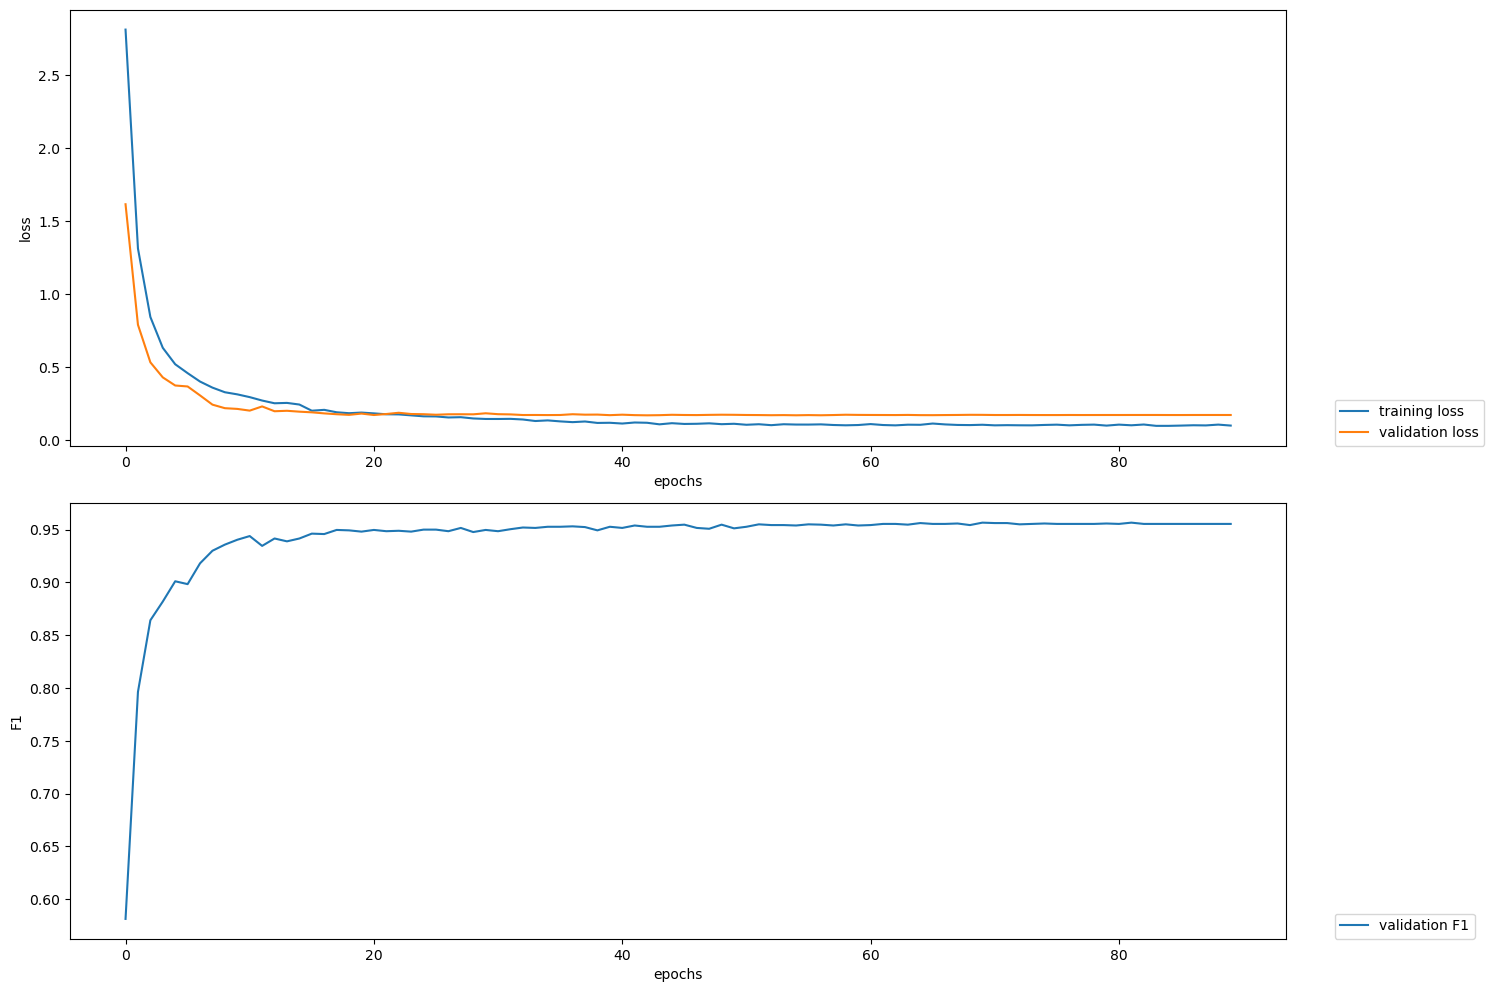

In [12]:
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('tagger/loss.tsv')